In [1]:
import torch
from matplotlib import pyplot as plt
from flow_matching.whar.sampler import WHARSamplerRAW
from flow_matching.whar.stft import (
    stft_transform,
    istft_transform,
    plot_spectrogram_grid,
)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
sampler = WHARSamplerRAW()

Creating config hash...
Checking download...
Download exists.
Checking sessions...
Sessions exist.
Validating common format...
[########################################] | 100% Completed | 738.80 ms
Common format validated.
Checking windowing...
Loading config hash...
Windowing exists.
subject_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
activity_ids: [0 1 2 3 4 5]
train: 7046 | val: 782 | test: 1671
Postprocessing...


Loading windows: 100%|██████████| 9499/9499 [00:07<00:00, 1246.26it/s]


Getting normalization parameters...
Loading config hash...
Creating normalization parameters hash...
Loading normalization parameters hash...


Loading samples: 100%|██████████| 9499/9499 [00:02<00:00, 3917.41it/s]


In [4]:
shape = sampler.get_shape()
num_classes = len(sampler.dataset.get_class_weights(sampler.train_loader).keys())
print(f"shape: {shape}, num_classes: {num_classes}")

shape: [128, 9], num_classes: 6


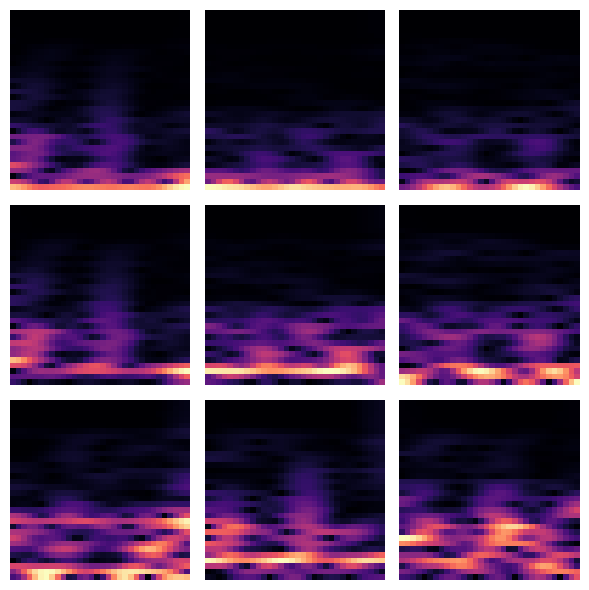

torch.Size([9, 2, 32, 32])
Max: 29.0952091217041, Min: -31.49169158935547


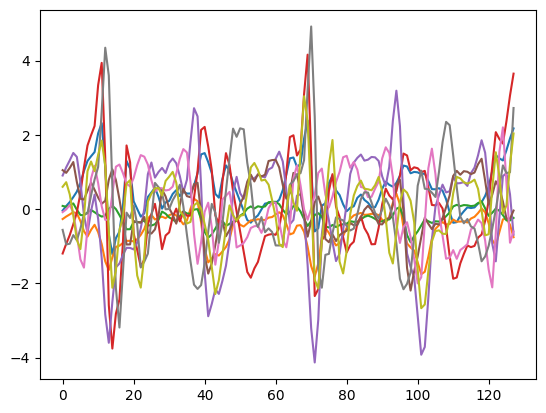

torch.Size([128, 9])


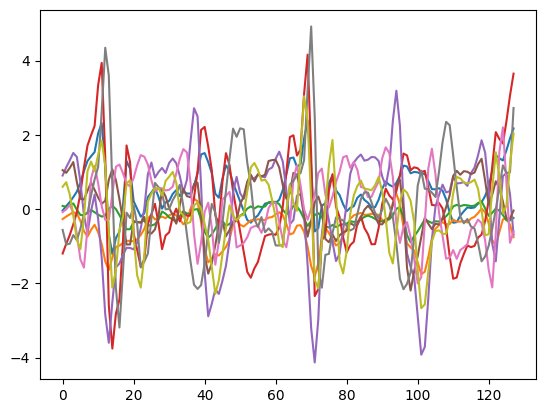

torch.Size([128, 9])


In [7]:
x, y = sampler.sample(1)
sample = x[0]

spect = stft_transform(sample)
recon = istft_transform(spect)

plot_spectrogram_grid(spect)
print(spect.shape)
print(f"Max: {spect.max()}, Min: {spect.min()}")

plt.plot(sample)
plt.show()
print(sample.shape)

plt.plot(recon)
plt.show()
print(recon.shape)